In [1]:
# Calcula un índice por país de vulnerabilidad socioeconómica

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
from scipy import stats

# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../results/"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso = df_iso.drop( ["ATA", "ATF", "HMD", "SJM", "SXM", "VAT",
    "BVT", "SGS", "UMI", "ESH", "TKL", "IOT"] )
df_iso.index.name = ix

# Nombres de variables a usar
vars = ["Life expectancy at birth", "GNI per capita",
    "Gender Development index",
    "% rural population",
    "% population below 5 or above 65 years old"
    ]
var_i = [v + "_index" for v in vars]

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Life Expectancy at birth)
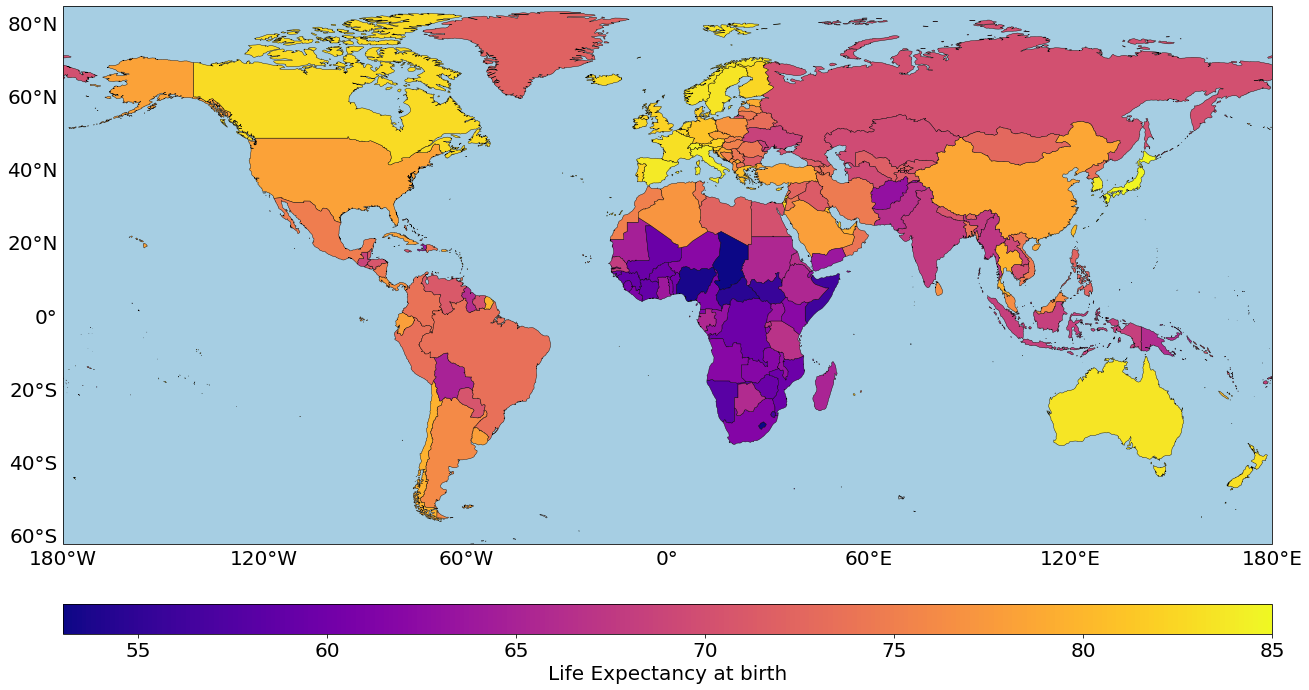

Sin datos: 0 países


,Name,Life Expectancy at birth
ISO_A3,,
LSO,Lesotho,53.0
TCD,Chad,53.0
NGA,Nigeria,53.6
CAF,Central African Republic,54.5
SSD,South Sudan,55.6
SOM,Somalia,56.1
SWZ,Eswatini (Kingdom of),56.4
NAM,Namibia,58.1
CIV,Côte d'Ivoire,58.9


In [3]:
# Primeras dos categorías
id = "GDI_HDI"

# Cargamos el archivo
df = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = ix ).drop(columns = ["Source"])


# Life expectancy at birth
i = 0

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
# Eliminamos Mónaco por motivos de visualización
borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 50
max = 85
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

min: 0.2919861423696652, max: 1.0372014880666531


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (GNI per capita)
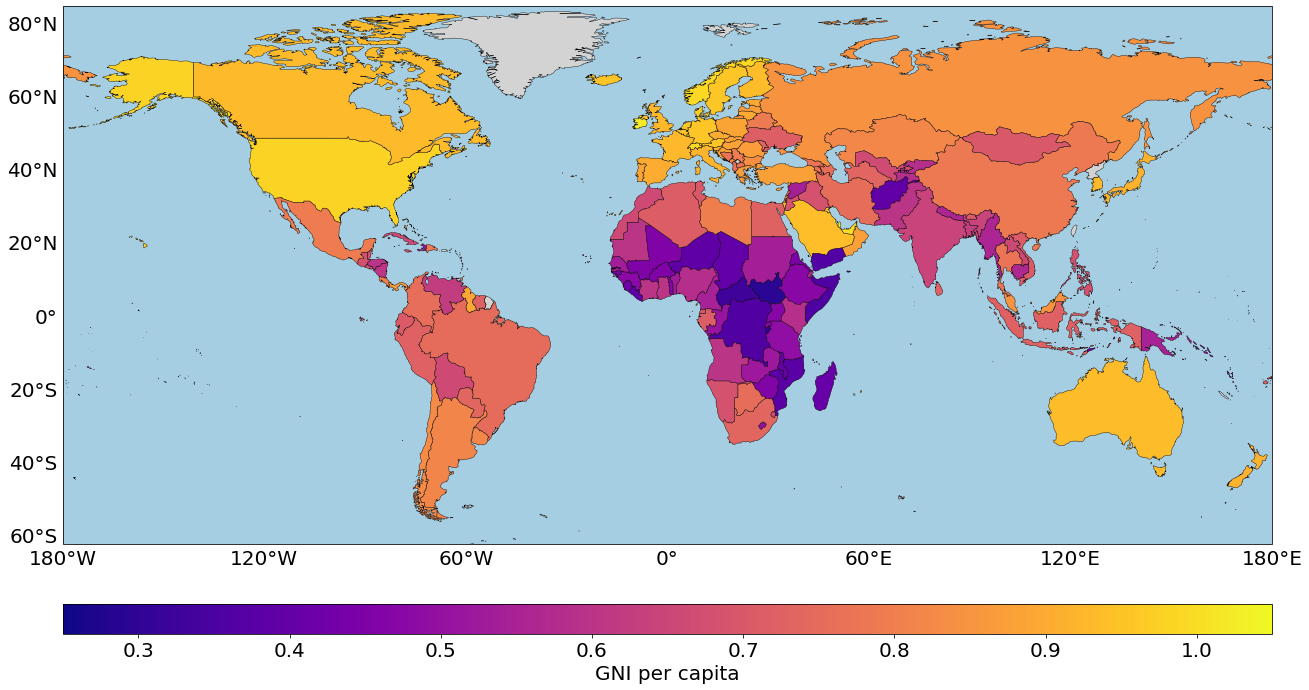

Sin datos: 48 países


,Name,GNI per capita
ISO_A3,,
SSD,South Sudan,691.0
BDI,Burundi,712.0
CAF,Central African Republic,869.0
SOM,Somalia,1072.0
COD,Congo (Democratic Republic of the),1080.0
YEM,Yemen,1106.0
MOZ,Mozambique,1219.0
NER,Niger,1283.0
LBR,Liberia,1330.0


In [4]:
# log GNI per capita, PPP
i = 1

# Mapa
borders[vars[i]] = ( np.log( df.reset_index().set_index(ix)[vars[i]] )
    - np.log(100) ) / np.log(750)
# Eliminamos Lietchtenstein por motivos de visualización
borders.loc["LIE"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 0.25
max = 1.05
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

min: 0.456, max: 1.037


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Gender Development index)
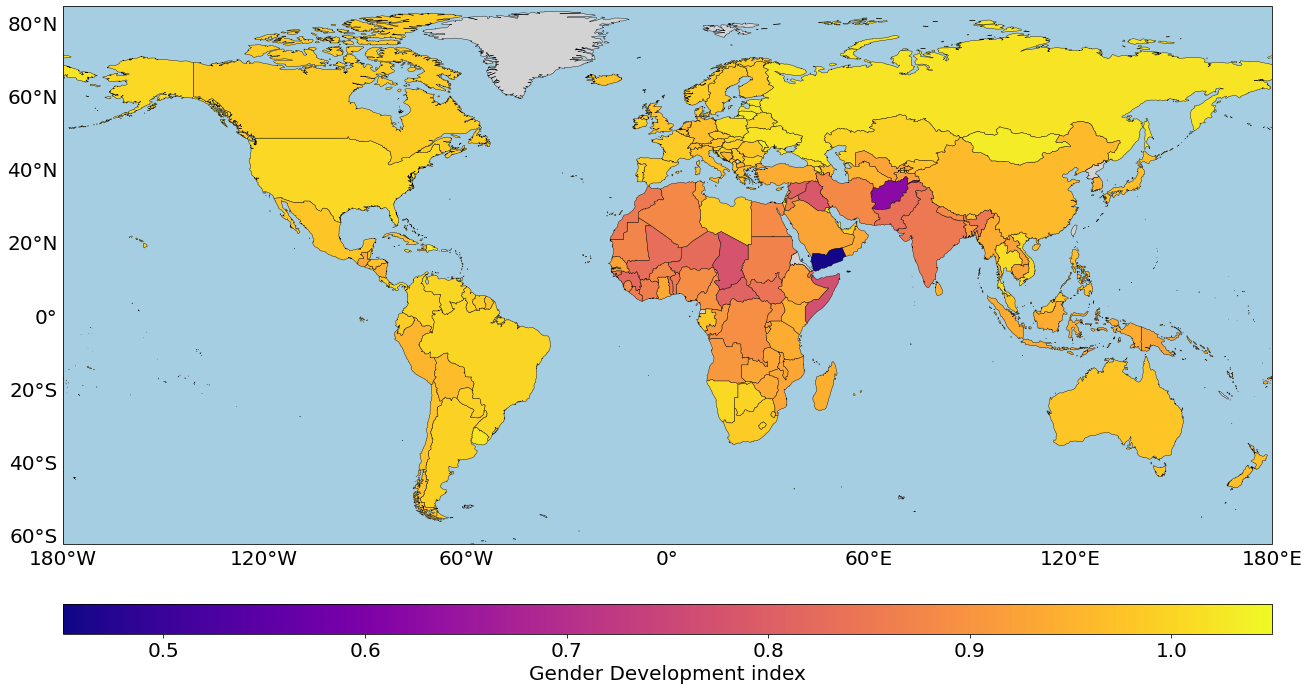

Sin datos: 50 países


,Name,Gender Development index
ISO_A3,,
YEM,Yemen,0.456
AFG,Afghanistan,0.622
SOM,Somalia,0.769
TCD,Chad,0.776
IRQ,Iraq,0.786
SYR,Syrian Arab Republic,0.805
CAF,Central African Republic,0.810
GIN,Guinea,0.818
NER,Niger,0.826


In [5]:
# Gender Development index
i = 2

df = df.rename(columns = {"GDI": vars[i]})

# Mapa
borders[vars[i]] = df[vars[i]]
# Eliminamos Seychelles por motivos de visualización
borders.loc["SYC"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 0.45
max = 1.05
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

min: 0.0, max: 86.27700417359999


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% rural population)
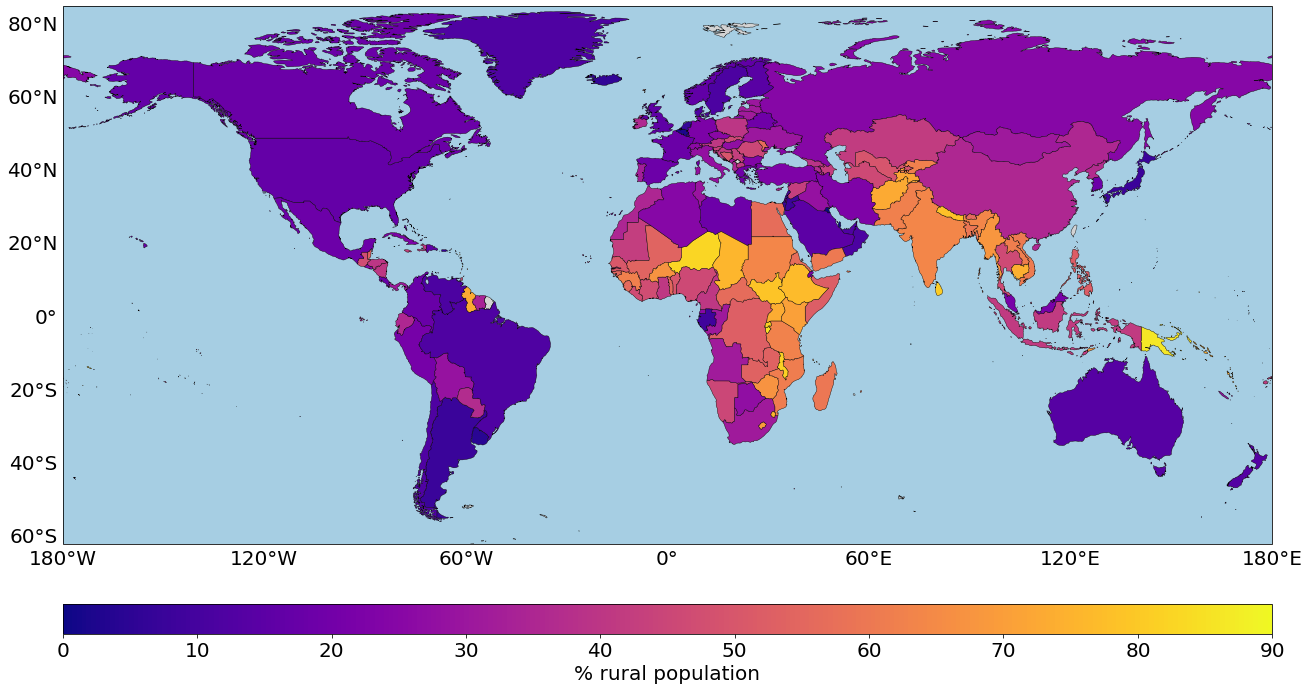

Sin datos: 27 países


,Name,% rural population
ISO_A3,,
BMU,Bermuda,0.0
MAC,Macao,0.0
KWT,Kuwait,0.0
MCO,Monaco,0.0
CYM,Cayman Islands,0.0
SGP,Singapore,0.0
GIB,Gibraltar,0.0
NRU,Nauru,0.0
SXM,Sint Maarten,0.0


In [6]:
# Cargamos el archivo de población
id = "Population"

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], index_col = "Country Code")
df_i.index.name = ix

v_pop = [ "SP.RUR.TOTL", "SP.POP.0014.TO",#"SP.POP.0004.FE", "SP.POP.0004.MA",
    "SP.POP.65UP.TO", "SP.POP.TOTL" ]
for v in v_pop:
    df[v] = df_i.loc[ df_i["Indicator Code"] == v, "2023" ]

# Rurality
i = 3

df[vars[i]] = 100 * df[v_pop[0]] / df[v_pop[3]]

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
# Eliminamos Lietchtenstein por motivos de visualización
#borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 0
max = 90
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

min: 6.5600644384405635, max: 33.41494490897402


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% population below 5 or above 65 years old)
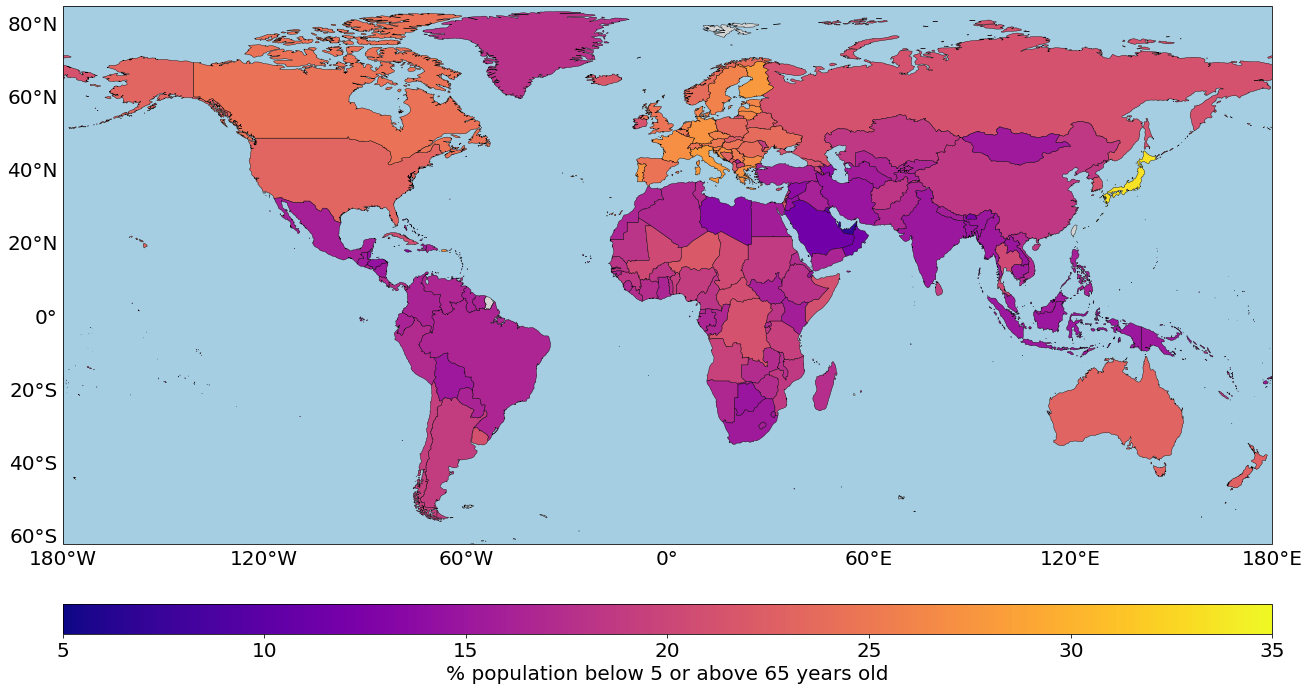

Sin datos: 25 países


,Name,% population below 5 or above 65 years old
ISO_A3,,
QAT,Qatar,6.560064
ARE,United Arab Emirates,6.888388
BHR,Bahrain,10.096337
KWT,Kuwait,10.791470
SAU,Saudi Arabia,11.578575
OMN,Oman,11.839396
MDV,Maldives,12.066692
BTN,Bhutan,12.466727
BRN,Brunei Darussalam,13.351557


In [7]:
# Age dependency
i = 4

df[vars[i]] = 100 * df[v_pop[1:3]].sum(axis = 1) / df[v_pop[3]]

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
# Eliminamos Monaco por motivos de visualización
borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 5
max = 35
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Socioeconomic vulnerability index)
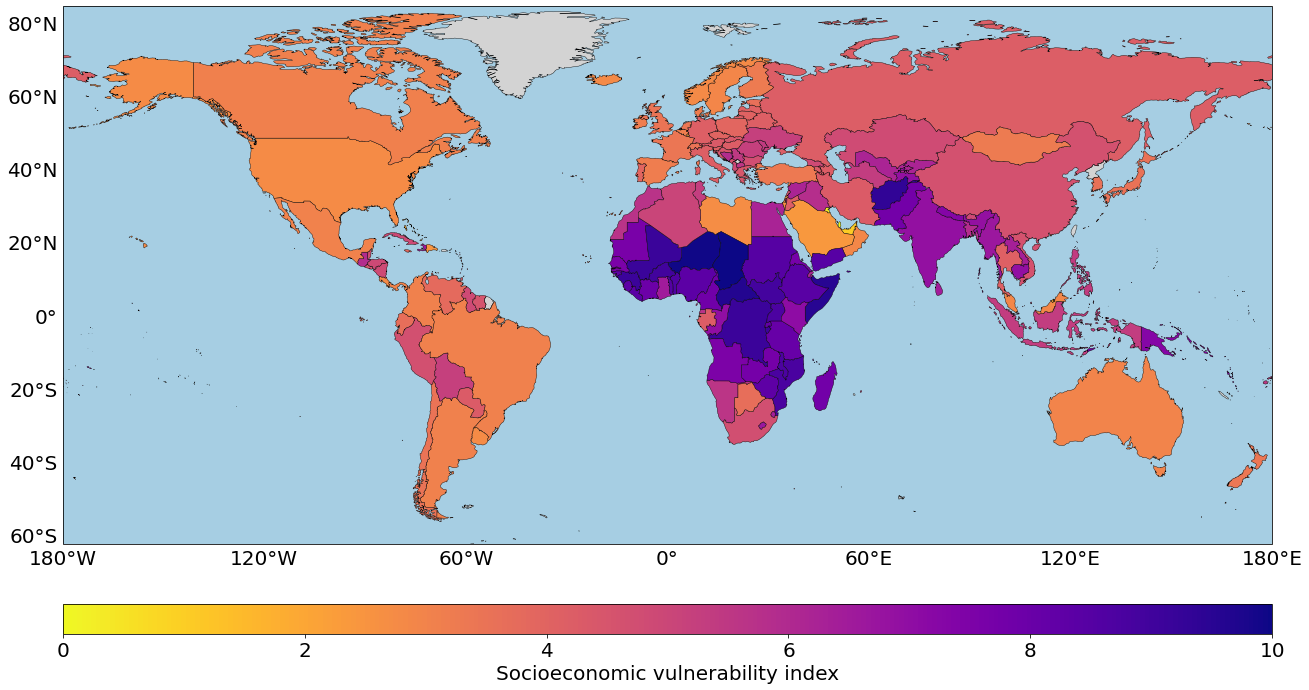

,Name,Socioeconomic vulnerability index,Life Expectancy at birth_index,GNI per capita_index,Gender Development index_index,% rural population_index,% population below 5 or above 65 years old_index
ISO_A3,,,,,,,
TCD,Chad,10.000000,9.922280,9.430052,9.786096,9.222798,7.202073
NER,Niger,9.950183,8.575130,9.585492,9.518717,9.844560,7.823834
CAF,Central African Republic,9.609694,9.792746,9.844560,9.625668,7.357513,7.253886
SOM,Somalia,9.539388,9.689119,9.792746,9.839572,6.891192,7.357513
AFG,Afghanistan,9.342202,8.419689,9.481865,9.893048,8.911917,6.010363
MLI,Mali,9.171493,9.404145,9.015544,9.465241,7.098446,6.994819
GIN,Guinea,9.118379,9.481865,8.601036,9.572193,7.979275,6.113990
COD,Congo (Democratic Republic of the),9.108774,9.274611,9.740933,8.235294,6.943005,7.512953
BDI,Burundi,9.090653,8.652850,9.896373,7.379679,9.896373,5.803109


In [8]:
# Índice de vulnerabilidad socioeconómica
index_n = "Socioeconomic vulnerability index"

# Índice por unidad geográfico ISO-3166-1
df = df.reset_index().set_index(ix)

# Cálculo del índice para cada categoría
var_i = [v + "_index" for v in vars]
# Países con al menos 4 valores
df = df[ df[vars].count(axis = 1) > 3 ]
# Normalización 0-10
for i, v in enumerate(vars):
    df[ var_i[i] ] = stats.percentileofscore( df[ vars[i] ],
        df[ vars[i] ], nan_policy = "omit" ) / 10
    #min_v = df[v].min()
    #max_v = df[v].max()
    #rng_v = max_v - min_v
    #df[ var_i[i] ] = 10 * ( df[v] - min_v ) / rng_v
    if v in vars[0:3]: df[ var_i[i] ] = 10 - df[ var_i[i] ]

# Cálculo del índice
df[index_n] = df[var_i].mean(axis = 1)
# Normalización 0-10
min_v = df[index_n].min()
max_v = df[index_n].max()
rng_v = max_v - min_v
df[ index_n ] = 10 * ( df[index_n] - min_v ) / rng_v

# Guardamos el archivo
df.to_csv(path_r + "socioeconomic_index.csv")

# Mapa
borders[index_n] = df[index_n]
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(index_n, range = (0, 10.0001) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# 10 países más altos
df[["Name", index_n] + var_i].sort_values(index_n, ascending = False).head(10)

In [9]:
# Información para un país específico
country = "FJI"

df.loc[country]

Name                                                     Fiji
HDI                                                     0.729
Gender Development index                                 0.94
SVN_A3                                                    FJI
Mean Years of Schooling                                  10.4
Life Expectancy at birth                                 68.3
GNI per capita                                        11234.0
GII                                                     0.332
SP.RUR.TOTL                                          386601.0
SP.POP.0004.FE                                        42410.0
SP.POP.0004.MA                                        45161.0
SP.POP.65UP.TO                                        57074.0
SP.POP.TOTL                                          936375.0
% rural population                                  41.286984
% population below 5 or above 65 years old          15.447337
Life Expectancy at birth_index                       6.865285
GNI per 